## Lab2: X bar control chart and Interpretation

import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Loading the data

In [4]:
data = pd.read_excel('fill_heights.xlsx')
data.head()

,Sample Number,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,1,2.5,0.5,2.0,-1.0,1.0,-1.0,0.5,1.5,0.5,-1.5
1,2,0.0,0.0,0.5,1.0,1.5,1.0,-1.0,1.0,1.5,-1.0
2,3,1.5,1.0,1.0,-1.0,0.0,-1.5,-1.0,-1.0,1.0,-1.0
3,4,0.0,0.5,-2.0,0.0,-1.0,1.5,-1.5,0.0,-2.0,-1.5
4,5,0.0,0.0,0.0,-0.5,0.5,1.0,-0.5,-0.5,0.0,0.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sample Number  15 non-null     int64  
 1   x1             15 non-null     float64
 2   x2             15 non-null     float64
 3   x3             15 non-null     float64
 4   x4             15 non-null     float64
 5   x5             15 non-null     float64
 6   x6             15 non-null     float64
 7   x7             15 non-null     float64
 8   x8             15 non-null     float64
 9   x9             15 non-null     float64
 10  x10            15 non-null     float64
dtypes: float64(10), int64(1)
memory usage: 1.4 KB


In [24]:
# Calculate X bar, Range and concatanate to the dataset
sample = 15
size = 10

data['x_bar'] = pd.DataFrame([data.iloc[i, 1:size+1].mean() for i in range(sample)])
data['range_r'] = pd.DataFrame([(data.iloc[i, 1:size+1].max()- data.iloc[i, 1:size+1].min()) for i in range(sample)])
data


,Sample Number,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x_bar,range_r
0,1,2.5,0.5,2.0,-1.0,1.0,-1.0,0.5,1.5,0.5,-1.5,0.50,4.0
1,2,0.0,0.0,0.5,1.0,1.5,1.0,-1.0,1.0,1.5,-1.0,0.45,2.5
2,3,1.5,1.0,1.0,-1.0,0.0,-1.5,-1.0,-1.0,1.0,-1.0,-0.10,3.0
3,4,0.0,0.5,-2.0,0.0,-1.0,1.5,-1.5,0.0,-2.0,-1.5,-0.60,3.5
4,5,0.0,0.0,0.0,-0.5,0.5,1.0,-0.5,-0.5,0.0,0.0,0.00,1.5
5,6,1.0,-0.5,0.0,0.0,0.0,0.5,-1.0,1.0,-2.0,1.0,0.00,3.0
6,7,1.0,-1.0,-1.0,-1.0,0.0,1.5,0.0,1.0,0.0,0.0,0.05,2.5
7,8,0.0,-1.5,-0.5,1.5,0.0,0.0,0.0,-1.0,0.5,-0.5,-0.15,3.0
8,9,-2.0,-1.5,1.5,1.5,0.0,0.0,0.5,1.0,0.0,1.0,0.20,3.5
9,10,-0.5,3.5,0.0,-1.0,-1.5,-1.5,-1.0,-1.0,1.0,0.5,-0.15,5.0


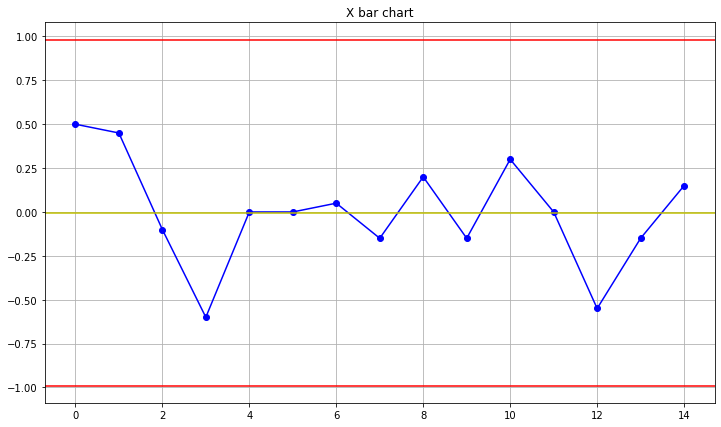

In [25]:
# x-bar chart upper control limit and lower control limits
x_bar_bar = data.x_bar.mean()
r_bar = data.range_r.mean()
a2 = 0.308 # Standard Factor for LCL and UCL for X-chart

UCLx = x_bar_bar + a2 * r_bar
LCLx = x_bar_bar - a2 * r_bar

# Plotting the result
plt.figure(figsize=(12, 7))
plt.title('X bar chart')
plt.plot(range(len(data.x_bar)), data.x_bar ,'bo-' )
plt.axhline(y=UCLx, color='r', linestyle='-')
plt.axhline(y=LCLx, color='r', linestyle='-')
plt.axhline(y=x_bar_bar, color='y', linestyle='-')
plt.grid()